In [276]:
pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [277]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [278]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [279]:
pip install statsmodels --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [280]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [281]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import plotly.express as px
import plotly.io as pio

In [282]:
# Set the path to the file you'd like to load
file_path = "vgsales.csv"

# Load the latest version
df = kagglehub.load_dataset(  KaggleDatasetAdapter.PANDAS,
  "anandshaw2001/video-game-sales",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



C:\Users\23070070\AppData\Local\Temp\ipykernel_5860\651042041.py:5: DeprecationWarning:

Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.



# Análise Exploratória

In [283]:
print(df.shape)

(16598, 11)


In [284]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [285]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [286]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [287]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [288]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


--------------------------------------------------------------------------------

In [289]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [290]:
df['Year'].value_counts().head()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: count, dtype: int64

In [291]:
df['Year'].mode()[0]

np.float64(2009.0)

In [292]:
df['Publisher'].value_counts().head()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: count, dtype: int64

# Tratamento

In [293]:
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])

In [294]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])

# Insights

## Evolução das Vendas Globais por Ano

In [295]:
df_ano = df.groupby('Year')['Global_Sales'].sum().reset_index()
df_ano.head()

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


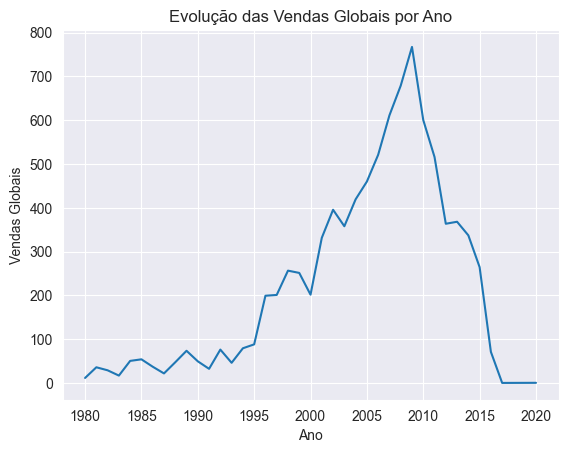

In [296]:
plt.plot(df_ano['Year'], df_ano['Global_Sales'])
plt.xlabel('Ano')
plt.ylabel('Vendas Globais')
plt.title('Evolução das Vendas Globais por Ano')
plt.show()

In [297]:
fig_VendasAno = px.line(df_ano, x='Year', y='Global_Sales', title='Vendas Globais por Ano')
pio.write_json(fig_VendasAno, "Figuras/fig_VendasAno.json")

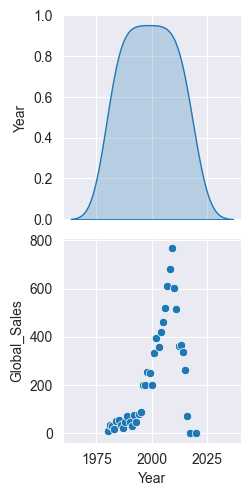

In [298]:
sns.pairplot(df_ano, diag_kind='kde', x_vars=['Year'])

# Gêneros mais Comprados por Continente

- Gêneros mais comprados na Europa

In [299]:
df_genEU = df[['Genre', 'EU_Sales']]
df_genEU.head()

,Genre,EU_Sales
0,Sports,29.02
1,Platform,3.58
2,Racing,12.88
3,Sports,11.01
4,Role-Playing,8.89


In [300]:
df_genEU = df_genEU.groupby('Genre')['EU_Sales'].sum().reset_index()
df_genEU = df_genEU.sort_values(by='EU_Sales', ascending=False).head()
df_genEU.head()

,Genre,EU_Sales
0,Action,525.00
10,Sports,376.85
8,Shooter,313.27
6,Racing,238.39
3,Misc,215.98


- Gêneros mais Comprados na América do Norte

In [301]:
df_genNA = df[['Genre', 'NA_Sales']]
df_genNA.head()

,Genre,NA_Sales
0,Sports,41.49
1,Platform,29.08
2,Racing,15.85
3,Sports,15.75
4,Role-Playing,11.27


In [302]:
df_genNA = df_genNA.groupby('Genre')['NA_Sales'].sum().reset_index()
df_genNA = df_genNA.sort_values(by='NA_Sales', ascending=False).head()
df_genNA.head()

,Genre,NA_Sales
0,Action,877.83
10,Sports,683.35
8,Shooter,582.60
4,Platform,447.05
3,Misc,410.24


- Gêneros mais Comprados no Japão

In [303]:
df_genJP = df[['Genre', 'JP_Sales']]
df_genJP.head()

,Genre,JP_Sales
0,Sports,3.77
1,Platform,6.81
2,Racing,3.79
3,Sports,3.28
4,Role-Playing,10.22


In [304]:
df_genJP = df_genJP.groupby('Genre')['JP_Sales'].sum().reset_index()
df_genJP = df_genJP.sort_values(by='JP_Sales', ascending=False).head()
df_genJP.head()

,Genre,JP_Sales
7,Role-Playing,352.31
0,Action,159.95
10,Sports,135.37
4,Platform,130.77
3,Misc,107.76


- Gêneros mais Comprados no resto do Mundo

In [305]:
df_genOther = df[['Genre', 'Other_Sales']]
df_genOther.head()

,Genre,Other_Sales
0,Sports,8.46
1,Platform,0.77
2,Racing,3.31
3,Sports,2.96
4,Role-Playing,1.00


In [306]:
df_genOther = df_genOther.groupby('Genre')['Other_Sales'].sum().reset_index()
df_genOther = df_genOther.sort_values(by='Other_Sales', ascending=False).head()
df_genOther



,Genre,Other_Sales
0,Action,187.38
10,Sports,134.97
8,Shooter,102.69
6,Racing,77.27
3,Misc,75.32


- Plot

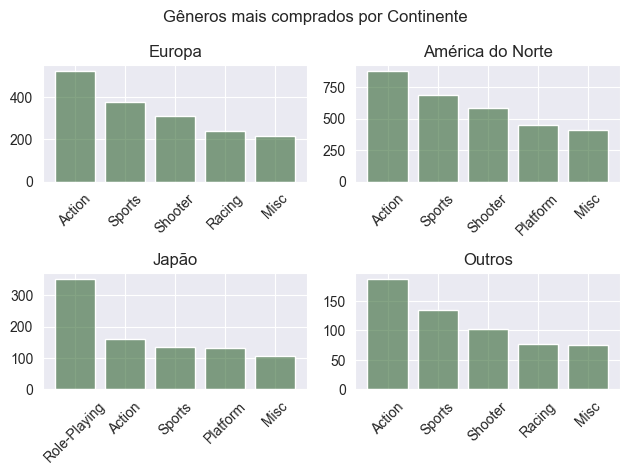

In [307]:
color = (0.2,
         0.4,
         0.2,
         0.6
         )

# Cria uma figura e uma matriz de 2x2 subplots (2 linhas, 2 colunas)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Gêneros mais comprados por Continente')

# Acessa e plota no primeiro subplot (0,0)
axs[0, 0].bar(df_genEU['Genre'], df_genEU['EU_Sales'], color = color)
axs[0, 0].set_title('Europa')
axs[0, 0].tick_params(axis='x', labelrotation=45)

# Acessa e plota no segundo subplot (0,1)
axs[0, 1].bar(df_genNA['Genre'], df_genNA['NA_Sales'], color = color)
axs[0, 1].set_title('América do Norte')
axs[0, 1].tick_params(axis='x', labelrotation=45)

# Acessa e plota no segundo subplot (0,1)
axs[1, 0].bar(df_genJP['Genre'], df_genJP['JP_Sales'], color = color)
axs[1, 0].set_title('Japão')
axs[1, 0].tick_params(axis='x', labelrotation=45)

axs[1, 1].bar(df_genOther['Genre'], df_genOther['Other_Sales'], color = color)
axs[1, 1].set_title('Outros')
axs[1, 1].tick_params(axis='x', labelrotation=45)



fig_GenEU = px.bar(df_genEU, x='Genre', y='EU_Sales', title='Europa')
pio.write_json(fig_GenEU, "Figuras/fig_GenEU.json")

fig_GenNA = px.bar(df_genNA, x='Genre', y='NA_Sales', title='América do Norte')
pio.write_json(fig_GenNA, "Figuras/fig_GenNA.json")

fig_GenJP = px.bar(df_genJP, x='Genre', y='JP_Sales', title='Japão')
pio.write_json(fig_GenJP, "Figuras/fig_GenJP.json")

fig_GenOthers = px.bar(df_genOther, x='Genre', y='Other_Sales', title='Outros')
pio.write_json(fig_GenOthers, "Figuras/fig_GenOthers.json")



plt.tight_layout()
plt.show()

# Impacto do tempo nas plataformas

- Plataformas mais Vendidas Mundialmente Antes dos Anos 2000

In [308]:
dfPlat = df[['Platform', 'Year', 'Global_Sales']]
dfPlat.head()

,Platform,Year,Global_Sales
0,Wii,2006.0,82.74
1,NES,1985.0,40.24
2,Wii,2008.0,35.82
3,Wii,2009.0,33.00
4,GB,1996.0,31.37


In [309]:
dfPlatMillenial = dfPlat.where(dfPlat['Year'] < 2000)
dfPlatMillenial.dropna(inplace = True)
dfPlatMillenial.head()

,Platform,Year,Global_Sales
1,NES,1985.0,40.24
4,GB,1996.0,31.37
5,GB,1989.0,30.26
9,NES,1984.0,28.31
12,GB,1999.0,23.10


In [310]:
dfPlatMillenial = dfPlatMillenial.groupby('Platform')['Global_Sales'].sum().reset_index()
dfPlatMillenial = dfPlatMillenial.sort_values(by='Global_Sales', ascending=False).head()
dfPlatMillenial.head()

,Platform,Global_Sales
12,PS,586.85
8,NES,251.07
4,GB,225.42
15,SNES,200.05
7,N64,180.86


- Plataformas mais Vendidas Mundialmente Depois dos Anos 2000

In [311]:
dfPlatZ = dfPlat.where(dfPlat['Year'] > 2000)
dfPlatZ.dropna(inplace = True)
dfPlatZ.head()

,Platform,Year,Global_Sales
0,Wii,2006.0,82.74
2,Wii,2008.0,35.82
3,Wii,2009.0,33.00
6,DS,2006.0,30.01
7,Wii,2006.0,29.02


In [312]:
dfPlatZ = dfPlatZ.groupby('Platform')['Global_Sales'].sum().reset_index()
dfPlatZ = dfPlatZ.sort_values(by='Global_Sales', ascending=False).head()
dfPlatZ.head()

,Platform,Global_Sales
10,PS2,1216.53
18,X360,979.96
11,PS3,957.84
16,Wii,926.71
3,DS,822.47


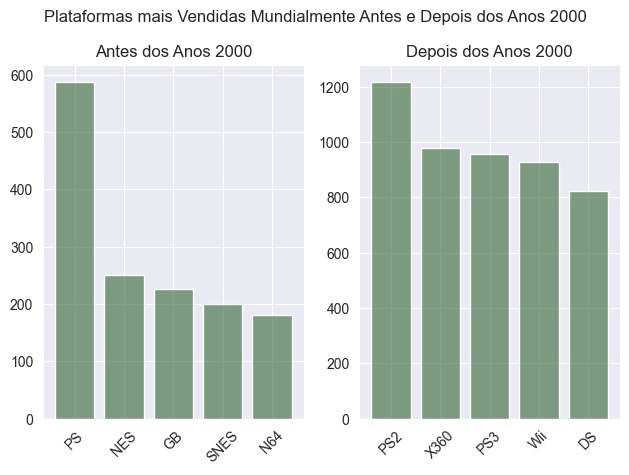

In [313]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Plataformas mais Vendidas Mundialmente Antes e Depois dos Anos 2000')

# Acessa e plota no primeiro subplot (0,0)
axs[0].bar(dfPlatMillenial['Platform'], dfPlatMillenial['Global_Sales'], color = color)
axs[0].set_title('Antes dos Anos 2000')
axs[0].tick_params(axis='x', labelrotation=45)

# Acessa e plota no segundo subplot (0,1)
axs[1].bar(dfPlatZ['Platform'], dfPlatZ['Global_Sales'], color = color)
axs[1].set_title('Depois dos Anos 2000')
axs[1].tick_params(axis='x', labelrotation=45)

fig_PlatMillennial = px.bar(dfPlatMillenial, x='Platform', y='Global_Sales', title='ANTES dos anos 2000')
pio.write_json(fig_PlatMillennial, "Figuras/fig_PlatMillennial.json")

fig_PlatZ = px.bar(dfPlatZ, x='Platform', y='Global_Sales', title='DEPOIS dos anos 2000')
pio.write_json(fig_PlatZ, "Figuras/fig_PlatZ.json")

plt.tight_layout()
plt.show()

# Vendas dos Continentes em Relação as Vendas Globais

In [314]:
dfRelacao = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
dfRelacao

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


In [315]:
coef_pearsonNA, p_valor = pearsonr(dfRelacao['NA_Sales'], dfRelacao['Global_Sales'])
print(coef_pearsonNA) ## vendas da américa do norte são altamente representativas em relação as vendas globais

0.941047357125552


In [316]:
coef_pearsonEU, p_valor = pearsonr(dfRelacao['EU_Sales'], dfRelacao['Global_Sales'])
print(coef_pearsonEU) ## vendas da europa são altamente representativas em relação as vendas globais

0.9028358134817437


In [317]:
coef_pearsonJP, p_valor = pearsonr(dfRelacao['JP_Sales'], dfRelacao['Global_Sales'])
print(coef_pearsonJP)

0.6118155181564975


In [318]:
coef_pearsonOther, p_valor = pearsonr(dfRelacao['Other_Sales'], dfRelacao['Global_Sales'])
print(coef_pearsonOther)

0.7483308464077953


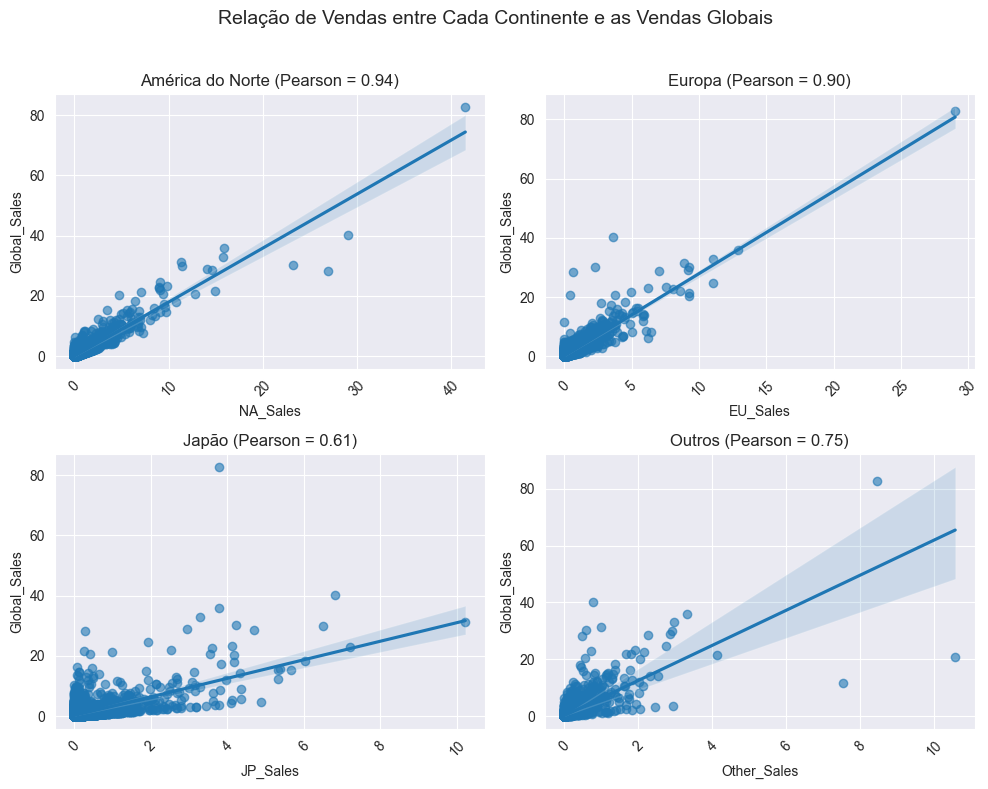

In [319]:
# Cria uma figura e uma matriz de 2x2 subplots (2 linhas, 2 colunas)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Relação de Vendas entre Cada Continente e as Vendas Globais', fontsize=14)

# América do Norte
sns.regplot(ax=axs[0, 0], x='NA_Sales', y='Global_Sales', data=dfRelacao, scatter_kws={"alpha":0.6})
axs[0, 0].set_title(f"{'América do Norte'} (Pearson = {coef_pearsonNA:.2f})")
axs[0, 0].tick_params(axis='x', labelrotation=45)

# Europa
sns.regplot(ax=axs[0, 1], x='EU_Sales', y='Global_Sales', data=dfRelacao, scatter_kws={"alpha":0.6})
axs[0, 1].set_title(f"{'Europa'} (Pearson = {coef_pearsonEU:.2f})")
axs[0, 1].tick_params(axis='x', labelrotation=45)

# Japão
sns.regplot(ax=axs[1, 0], x='JP_Sales', y='Global_Sales', data=dfRelacao, scatter_kws={"alpha":0.6})
axs[1, 0].set_title(f"{'Japão'} (Pearson = {coef_pearsonJP:.2f})")
axs[1, 0].tick_params(axis='x', labelrotation=45)

# Outros
sns.regplot(ax=axs[1, 1], x='Other_Sales', y='Global_Sales', data=dfRelacao, scatter_kws={"alpha":0.6})
axs[1, 1].set_title(f"{'Outros'} (Pearson = {coef_pearsonOther:.2f})")
axs[1, 1].tick_params(axis='x', labelrotation=45)

# Ajusta espaçamento
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [320]:
fig_RelacaoNA = px.scatter(
    dfRelacao,
    x='NA_Sales',
    y='Global_Sales',
    trendline='ols',  # cria a linha de regressão
    title=f"América do Norte (Pearson = {coef_pearsonNA:.2f})",
    opacity=0.6
)

# Europa
fig_RelacaoEU = px.scatter(
    dfRelacao,
    x='EU_Sales',
    y='Global_Sales',
    trendline='ols',
    title=f"Europa (Pearson = {coef_pearsonEU:.2f})",
    opacity=0.6
)

# Japão
fig_RelacaoJP = px.scatter(
    dfRelacao,
    x='JP_Sales',
    y='Global_Sales',
    trendline='ols',
    title=f"Japão (Pearson = {coef_pearsonJP:.2f})",
    opacity=0.6
)

# Outros
fig_RelacaoOther = px.scatter(
    dfRelacao,
    x='Other_Sales',
    y='Global_Sales',
    trendline='ols',
    title=f"Outros (Pearson = {coef_pearsonOther:.2f})",
    opacity=0.6
)

pio.write_json(fig_RelacaoNA, "Figuras/fig_RelacaoNA.json")
pio.write_json(fig_RelacaoEU, "Figuras/fig_RelacaoEU.json")
pio.write_json(fig_RelacaoJP, "Figuras/fig_RelacaoJP.json")
pio.write_json(fig_RelacaoOther, "Figuras/fig_RelacaoOther.json")

In [321]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [322]:
df_evolucao = df.groupby(['Genre', 'Year'])['Global_Sales'].sum().reset_index()

df_evolucaoAction = df_evolucao.loc[df_evolucao['Genre'] == 'Action']
df_evolucaoAdventure = df_evolucao.loc[df_evolucao['Genre'] == 'Adventure']
df_evolucaoFighting = df_evolucao.loc[df_evolucao['Genre'] == 'Fighting']
df_evolucaoMisc = df_evolucao.loc[df_evolucao['Genre'] == 'Misc']
df_evolucaoPlatform = df_evolucao.loc[df_evolucao['Genre'] == 'Platform']
df_evolucaoPuzzle = df_evolucao.loc[df_evolucao['Genre'] == 'Puzzle']
df_evolucaoRacing = df_evolucao.loc[df_evolucao['Genre'] == 'Racing']
df_evolucaoRolePlaying = df_evolucao.loc[df_evolucao['Genre'] == 'Role-Playing']
df_evolucaoShooter = df_evolucao.loc[df_evolucao['Genre'] == 'Shooter']
df_evolucaoSimulation = df_evolucao.loc[df_evolucao['Genre'] == 'Simulation']
df_evolucaoSports = df_evolucao.loc[df_evolucao['Genre'] == 'Sports']
df_evolucaoStrategy = df_evolucao.loc[df_evolucao['Genre'] == 'Strategy']


In [323]:
df_evolucao['Genre'].unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [324]:
fig_EvoGenAction = px.line(df_evolucaoAction, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenAction, "Figuras/fig_EvoGenAction.json")

fig_EvoGenAdventure = px.line(df_evolucaoAdventure, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenAdventure, "Figuras/fig_EvoGenAdventure.json")

# Fighting
fig_EvoGenFighting = px.line(df_evolucaoFighting, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenFighting, "Figuras/fig_EvoGenFighting.json")

# Misc
fig_EvoGenMisc = px.line(df_evolucaoMisc, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenMisc, "Figuras/fig_EvoGenMisc.json")

# Platform
fig_EvoGenPlatform = px.line(df_evolucaoPlatform, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenPlatform, "Figuras/fig_EvoGenPlatform.json")

# Puzzle
fig_EvoGenPuzzle = px.line(df_evolucaoPuzzle, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenPuzzle, "Figuras/fig_EvoGenPuzzle.json")

# Racing
fig_EvoGenRacing = px.line(df_evolucaoRacing, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenRacing, "Figuras/fig_EvoGenRacing.json")

# Role-Playing
fig_EvoGenRolePlaying = px.line(df_evolucaoRolePlaying, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenRolePlaying, "Figuras/fig_EvoGenRolePlaying.json")

# Shooter
fig_EvoGenShooter = px.line(df_evolucaoShooter, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenShooter, "Figuras/fig_EvoGenShooter.json")

# Simulation
fig_EvoGenSimulation = px.line(df_evolucaoSimulation, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenSimulation, "Figuras/fig_EvoGenSimulation.json")

# Sports
fig_EvoGenSports = px.line(df_evolucaoSports, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenSports, "Figuras/fig_EvoGenSports.json")

# Strategy
fig_EvoGenStrategy = px.line(df_evolucaoStrategy, x='Year', y='Global_Sales')
pio.write_json(fig_EvoGenStrategy, "Figuras/fig_EvoGenStrategy.json")

